In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('../peptidome.mplstyle')
#plt.style.use('talk')

import sys
sys.path.append('..')

from lib import *

In [31]:
S = 20
k = 10

Nn = k*(S-1)
N = float(S**k)

sigma_lognormal = 0.3
pi = np.random.lognormal(sigma=sigma_lognormal, size=S)
pi /= pi.sum()

psigmas = []
psigmaps = []
nsigmas = []
Nsample = 10000
for i in range(Nsample):
    sigma = np.random.randint(0, S, k)
    psigma = np.prod(pi[sigma])
    nsigma = np.prod(pi[sigma])*np.sum((1-pi[sigma])/pi[sigma])
    psigmas.append(psigma)
    nsigmas.append(nsigma)
    
    i = np.random.randint(0, k)
    sigmai = np.random.choice([s for s in range(0, S) if s != sigma[i]])
    sigmap = np.asarray(list(sigma[:i]) + [sigmai] + list(sigma[i+1:]))
    psigmap = np.prod(pi[sigmap])
    psigmaps.append(psigmap)
nsigmas = np.asarray(nsigmas)
psigmas = np.asarray(psigmas)
psigmaps = np.asarray(psigmaps)
rho = np.corrcoef(psigmas, nsigmas)[1, 0]
print(r'$\rho_{p(\sigma), n(\sigma)}$:', rho)

$\rho_{p(\sigma), n(\sigma)}$: 0.9968480221759881


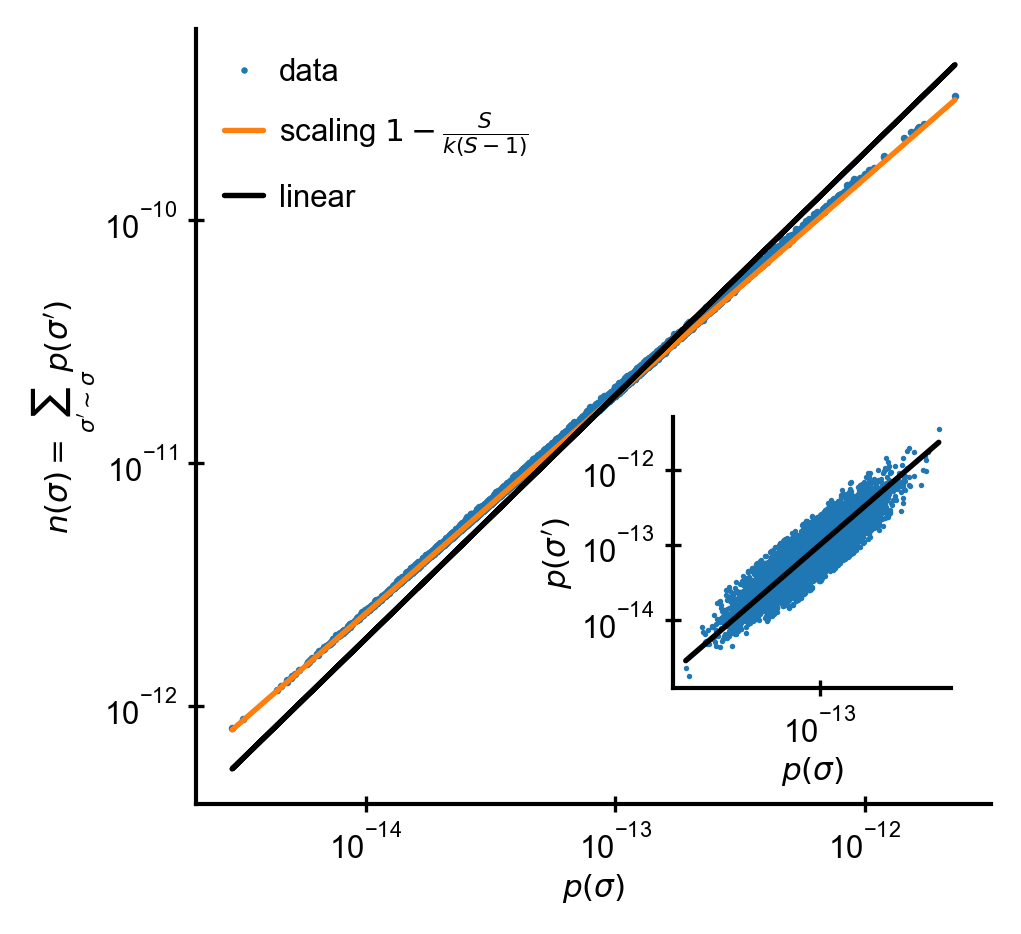

In [44]:
fig, ax = plt.subplots(figsize=(3.42, 3.42))
ax.plot(psigmas, nsigmas, '.', label='data', ms=2)
pmin, pmax = min(psigmas), max(psigmas)
psigmas_theory = np.linspace(pmin, pmax)
#ax.plot(psigmas_theory,
#        psigmas_theory*(Nn - S*np.log(psigmas_theory*N)),
#        '-', label='theory')
ax.plot(psigmas_theory,
        psigmas_theory**(1.0 - S/Nn) * Nn * S**(-S/(S-1)),
        '-', label=r'scaling $1-\frac{S}{k(S-1)}$')
ax.plot(psigmas, psigmas*Nn, 'k-', label='linear')
ins = ax.inset_axes((0.6, 0.15, 0.35, 0.35))
ins.plot(psigmas, psigmaps, '.', label='data', ms=1)
ins.plot(psigmas_theory, psigmas_theory, 'k-')
for a in [ax, ins]:
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xlabel('$p(\sigma)$')
ax.set_ylabel("$n(\sigma) = \sum_{\sigma' \sim \sigma} p(\sigma')$")
ins.set_ylabel("$p(\sigma')$")
ax.legend()
fig.savefig('nnproblikelihood.pdf')